Download the data into it's own folder (**data**) and read it in from there so we don't need a network connection to get at it later.  Set <code>stringsAsFactors = FALSE</code> because we'll do this manually ourselves.

In [1]:
# get the training data here: https://www.kaggle.com/c/titanic/data/train.csv
#data_all <- read.csv("../data/titanic_train.csv", na.strings = c("NA", ""), stringsAsFactors = FALSE)
data_all <- read.csv("https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/data/titanic_train.csv", na.strings = c("NA", ""), stringsAsFactors = FALSE)
head(data_all)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Looks like there is some missing data that we'll need to deal with.  Let's start by determining the numer of missing values in each field.

In [2]:
na_count <- sapply(data_all, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Let's take a quick look at **Survival** by **Sex** and **Pclass**.

In [3]:
data_all$Survived <- factor(data_all$Survived)
data_all$Sex <- factor(data_all$Sex)
sort(unique(data_all$Pclass))

[1] 1 2 3

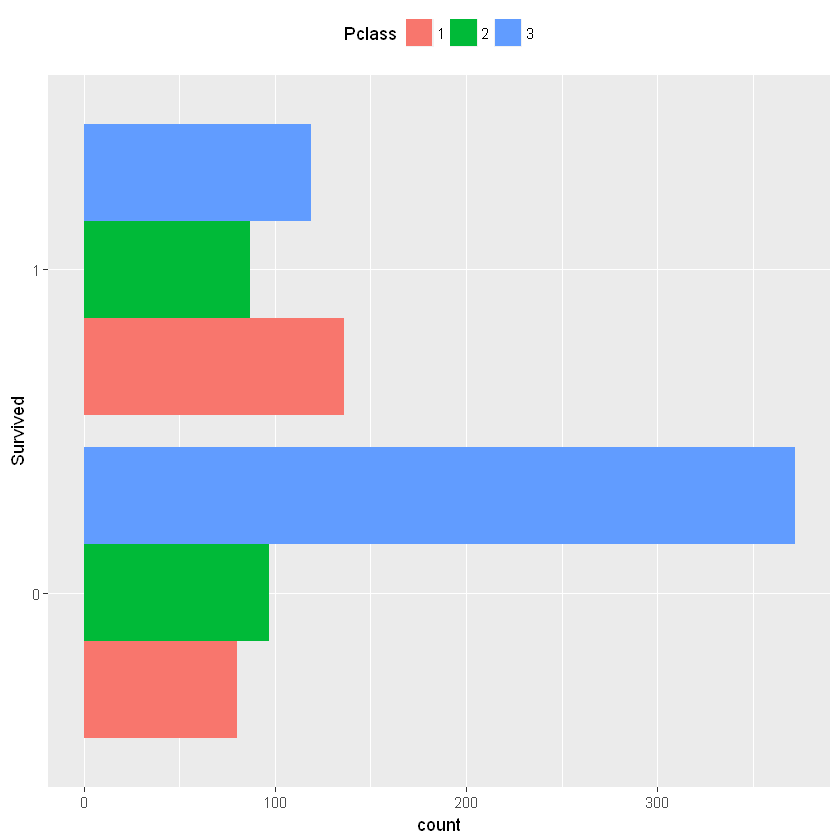

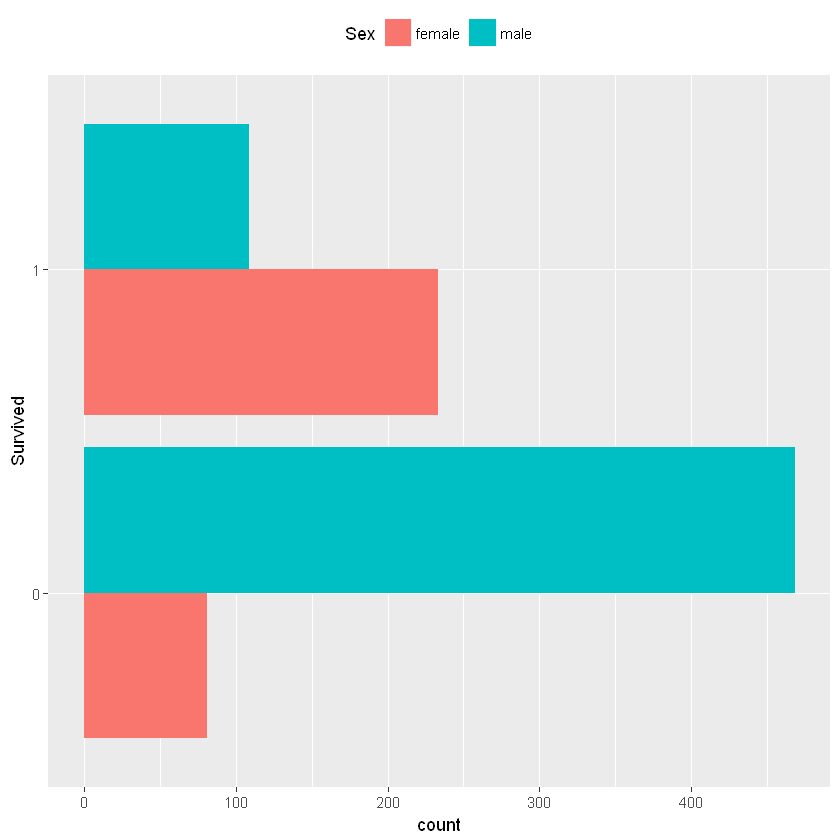

In [8]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
    suppressMessages(suppressWarnings(library(grid)))
    library(grid)
    
    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)
    
    numPlots = length(plots)
    
    # If layout is NULL, then use 'cols' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of cols
        layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                         ncol = cols, nrow = ceiling(numPlots/cols))
    }
    
    if (numPlots==1) {
        print(plots[[1]])
        
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
        
        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            
            print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                            layout.pos.col = matchidx$col))
        }
    }
}

# magic commands are an ipython kernel thing and don't work in an R notebook...
#%%R -i df -w 800 -h 480 -u px
# Make class barplot
library(ggplot2)
data_all$Pclass <- factor(data_all$Pclass)
p0 <- ggplot(data_all, aes(Survived))
options(jupyter.plot_mimetypes = 'image/png')
p1 <- p0 + geom_bar(aes(fill = Pclass), position = "dodge") + coord_flip()
p1 <- p1 + theme(legend.position = "top")
#p <- p + ggtitle(sprintf("Mime type = '%s'", getOption("jupyter.plot_mimetypes")))
print(p1)

p2 <- p0 + geom_bar(aes(fill = Sex), position = "dodge") + coord_flip()
p2 <- p2 + theme(legend.position = "top")
print(p2)

Looks like passengers who were in 1st class had a better chance of survival than 2nd or 3rd.